# Pymaceuticals Inc.
---

### Analysis

-This data clearly shows that Capomulin had the most tests conductied at 230 timepoints of reference. Ramicane came in right behind at 228 timepoints. Seven of the remaining eight had a small margin for varience with the two smallest of them being, Ceftamin and Infubinol. Propiva ended up being the least tested with only 148 timepoints. Unfortunetaly due to this small test size, the overall effectiveness of the drug can not be properly represented in this data. Now, using Ceftamin and Inbufinol as our smallest comaprable pair against our largest pair we can see clear differences simply looking at the box plot. Ceftamin and Inbufinol have a larger inner quartile ranges and Infubinol has an outlier. Capomulin and Ramicane have a smaller, more consistent inner quartile ranges. The mouse that was singled out for anaysis under the Capomulin Regimen we can see did have a reduction in tumor size over time. One other thing was made very clear thoughtout the data though, and it is displayed in the Line Regress Chart. Larger mice tended to have larger tumors.
 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_data_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [22]:
# Checking the number of mice.
mouse_data_df['Mouse ID'].value_counts()

Mouse ID
g989    13
a203    10
n364    10
m546    10
m550    10
        ..
x226     1
b447     1
f932     1
l872     1
n482     1
Name: count, Length: 249, dtype: int64

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
index_df = mouse_data_df.set_index('Mouse ID')
index_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID.


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = index_df.drop(['g989'])
clean_df.head(5)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,0,45.000000,0
a203,Infubinol,Female,20,23,5,48.508468,0
a203,Infubinol,Female,20,23,10,51.852437,1
a203,Infubinol,Female,20,23,15,52.777870,1
a203,Infubinol,Female,20,23,20,55.173336,1


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df2 = clean_df.reset_index()
clean_df2['Mouse ID'].value_counts()

Mouse ID
a203    10
l897    10
m546    10
m550    10
m601    10
        ..
d133     1
b447     1
u153     1
v199     1
t573     1
Name: count, Length: 248, dtype: int64

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor = clean_df2.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = tumor['Tumor Volume (mm3)'].mean()
tumor_med = tumor['Tumor Volume (mm3)'].median()
tumor_var = tumor['Tumor Volume (mm3)'].var()
tumor_std = tumor['Tumor Volume (mm3)'].std()
tumor_sem = tumor['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
tumor_summary_df = pd.DataFrame({
                        "Mean": tumor_mean,
                        "Median": tumor_med,
                        "Variance": tumor_var,
                        "Standard Deviation": tumor_std,
                        "SEM": tumor_sem
})

tumor_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor2 = clean_df2.groupby(
    ['Drug Regimen'])['Tumor Volume (mm3)'].agg(
        ['mean', 'median', 'var', 'std', 'sem'])
tumor2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Rows for Each Treatment Regimen'}, xlabel='Drug Regimen', ylabel='Number of Data Points'>

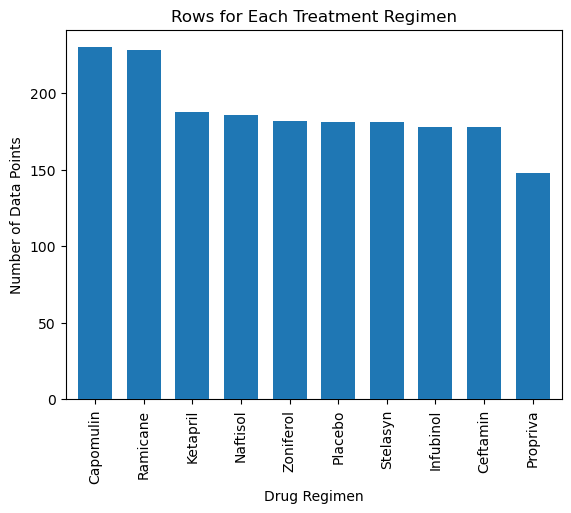

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas

bar_plot = clean_df['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Rows for Each Treatment Regimen")

bar_plot

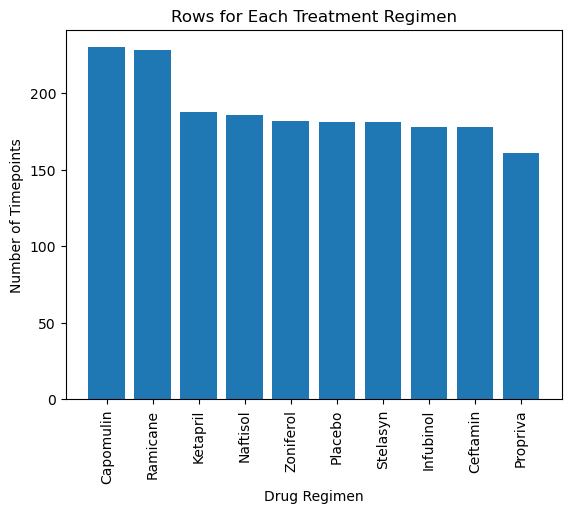

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_1 = data_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(count_1))

plt.bar(count_1.index, count_1.values)
plt.ylabel('Number of Timepoints', size=10)
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.title('Rows for Each Treatment Regimen')
plt.show()

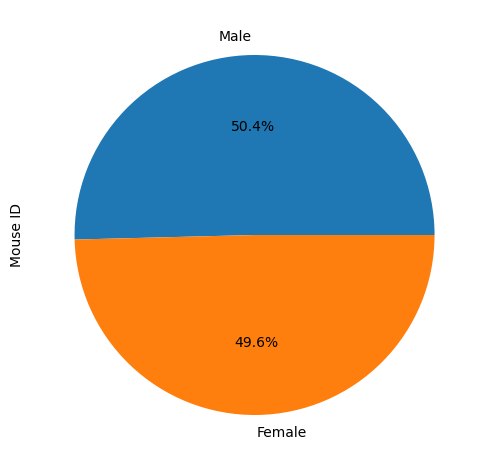

In [26]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
sex_pie = clean_df2.groupby(["Sex"])

# Get the unique mice with their gender
sex_pie_count = sex_pie["Mouse ID"].nunique().sort_values(ascending=False)
 
# Make the pie chart
sex_pie_count.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.show()

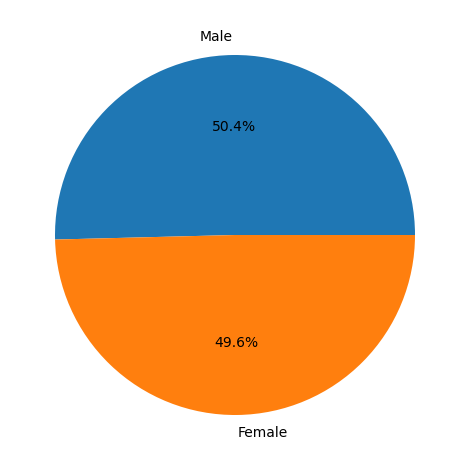

In [28]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
sex_pie_2 = clean_df2.groupby(["Sex"])

# Get the unique mice with their gender
sex_pie_count_2 = sex_pie_2["Mouse ID"].nunique().sort_values(ascending=False)
labels =  sex_pie_count_2.keys()

# Make the pie chart
plt.pie(sex_pie_count_2, labels=labels, autopct="%1.1f%%")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tomur = clean_df2.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tomur

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_destination = pd.merge(final_tomur, clean_df2, on=['Mouse ID', 'Timepoint'], how='inner')

In [30]:
# Put treatments into a list for for loop (and later for plot labels)
drug_name = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drug_tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drug_name:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_destination.loc[final_destination['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset
    drug_tumor.append(tumor_volume)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)

    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


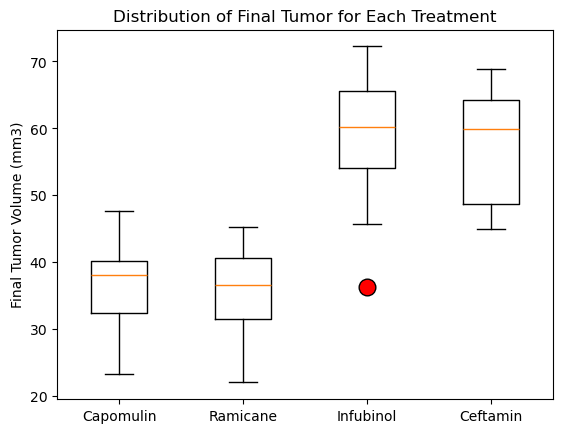

In [32]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(drug_tumor, labels=drug_name, flierprops=dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none'))
plt.title('Distribution of Final Tumor for Each Treatment')
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

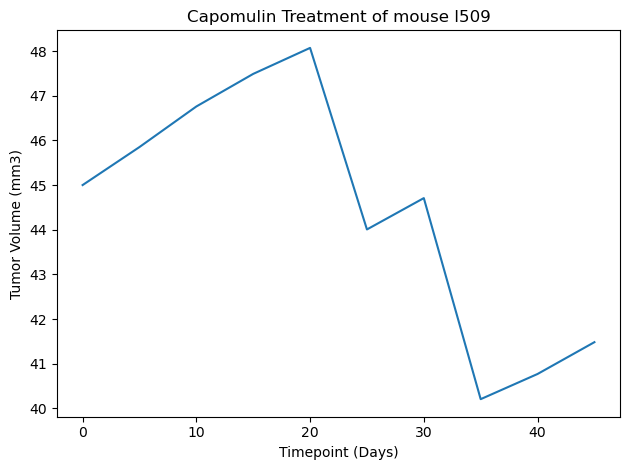

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = clean_df2[clean_df2['Drug Regimen'] == 'Capomulin']

test_mouse = capomulin_mice[capomulin_mice['Mouse ID'] == 'l509']
plt.plot(test_mouse['Timepoint'], test_mouse['Tumor Volume (mm3)'])
plt.title("Capomulin Treatment of mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

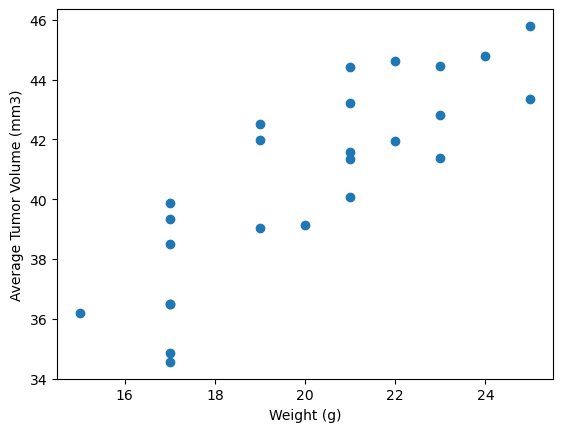

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_weight_avg = capomulin_mice.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()
plt.scatter(capomulin_weight_avg["Weight (g)"], capomulin_weight_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


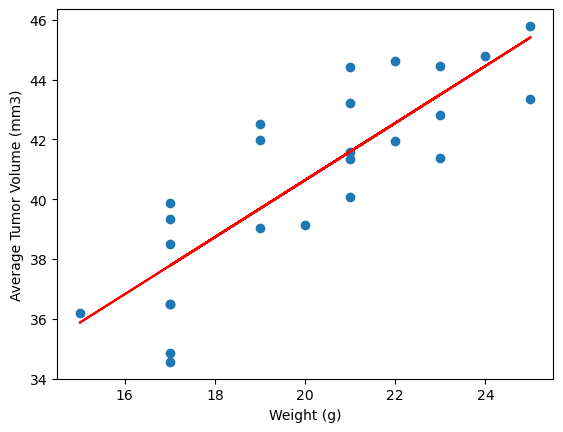

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cap_weight = capomulin_weight_avg["Weight (g)"]
cap_tumor = capomulin_weight_avg['Tumor Volume (mm3)']

correlation = st.pearsonr(cap_weight, cap_tumor)
corr_coef = round(correlation[0],2)
print(f"The correlation between mouse weight and the average tumor volume is: {corr_coef}")

cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(cap_weight, cap_tumor)
cap_fit = cap_slope * cap_weight + cap_int

plt.scatter(cap_weight, cap_tumor)
plt.plot(cap_weight, cap_fit, "--", color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()